In [1]:
from nltk import bigrams, trigrams
from collections import Counter
import io
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import spacy
from collections import defaultdict
from spacy.lang.en import English

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# !pip install spacy vaderSentiment

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp = spacy.load("en_core_web_md")

In [ ]:
import spacy
import re

from textblob import TextBlob

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_dataset_reviews.csv to Kaggle_dataset_reviews.csv


# Word Cloud

In [ ]:

df = pd.read_csv(io.BytesIO(uploaded['Kaggle_dataset_reviews.csv']))
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
df.shape

(1000, 10)

In [ ]:
# Club all reviews into a single text document
all_text = " ".join(df['text'].dropna())

Preprocessing

In [ ]:
# Apply full text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    doc = nlp(text)
    processed_words = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Remove stop words & non-alphabetic tokens
    ]

    return " ".join(processed_words)

clean_text = preprocess_text(all_text)

# print(clean_text)


In [ ]:
# POS Tagging & Extracting Nouns
def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]  # Extract only nouns
    return " ".join(nouns)

nouns_text = extract_nouns(clean_text)

In [ ]:
len(nouns_text)

144148

In [ ]:
nouns_text[0:20]

'hour end time locati'

Counter (Frequency of each word)

In [ ]:
from collections import Counter

# Tokenize the text and count noun frequencies
noun_list = nouns_text.split()  # Split the noun text into individual words
noun_freq = Counter(noun_list)  # Count occurrences of each noun

# Get the top 10 most frequent nouns
top_nouns = noun_freq.most_common(10)

# Display results
print("Top 10 Most Frequent Nouns:")
for noun, freq in top_nouns:
    print(noun + ": " + str(freq))

Top 10 Most Frequent Nouns:
food: 526
place: 491
time: 410
service: 309
order: 294
staff: 193
restaurant: 174
love: 170
price: 162
people: 142


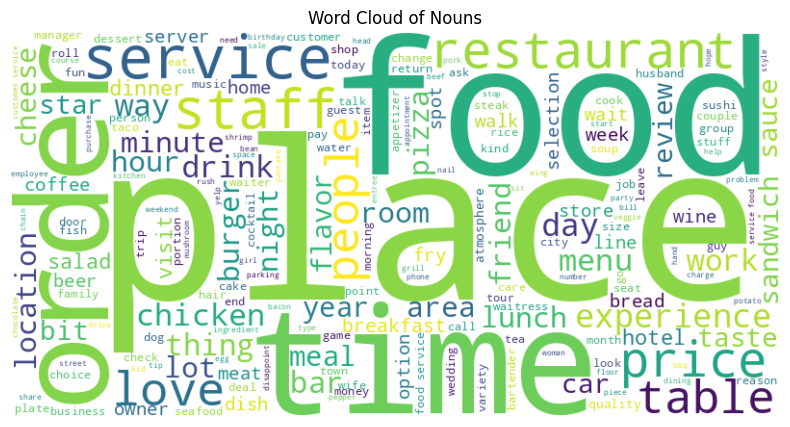

In [ ]:
# Generate Word Cloud for Nouns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(nouns_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Nouns")
plt.show()

BiGram and TriGram

In [ ]:
def get_ngrams(text, n):
    tokens = text.split()  # Tokenize
    n_grams = list(ngrams(tokens, n))  # Generate n-grams
    return Counter(n_grams)  # Count frequencies

# Get bigram and trigram frequencies
bigram_freq = get_ngrams(nouns_text, 2)
trigram_freq = get_ngrams(nouns_text, 3)

# Get top 10 most frequent bigrams and trigrams
top_bigrams = bigram_freq.most_common(10)
top_trigrams = trigram_freq.most_common(10)

print("Top 10 Most Frequent Bigrams:")
for bigram, freq in top_bigrams:
    print(' '.join(bigram) + ": " + str(freq))

print("\nTop 10 Most Frequent Trigrams:")
for trigram, freq in top_trigrams:
    print(' '.join(trigram) + ": " + str(freq))



Top 10 Most Frequent Bigrams:
food service: 39
customer service: 28
service food: 26
place food: 23
ice cream: 21
love place: 21
time time: 18
order food: 16
food drink: 14
place order: 13

Top 10 Most Frequent Trigrams:
place food service: 4
food love place: 4
hair hair hair: 4
parking lot staff: 3
ice cream cone: 3
food service food: 3
roast beef roast: 3
order fish taco: 3
prix fixe menu: 3
service beer selection: 3


TF_IDF

In [ ]:
# Assuming your DataFrame is 'df' and the reviews are in the 'text' column
# Preprocess text (cleaning, lemmatization, stopword removal)
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase
    processed_words = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Remove stop words & non-alphabetic tokens
    ]
    return " ".join(processed_words)

# Apply preprocessing to each review in the DataFrame
df1 = pd.DataFrame()
df1['cleaned_text'] = df['text'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF on cleaned text
tfidf_matrix = vectorizer.fit_transform(df1['cleaned_text'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Sum TF-IDF scores for each word across all reviews
word_scores = df_tfidf.sum(axis=0)

# Sort words by their total TF-IDF score and get the top 10 words
top_10_words = word_scores.sort_values(ascending=False).head(10)

print("Top 10 Most Important Words by TF-IDF Score:")
print(top_10_words)


Top 10 Most Important Words by TF-IDF Score:
good       40.777769
food       36.418233
place      35.288902
great      34.092139
time       26.499395
service    25.935970
come       22.277575
order      22.039387
love       21.482448
like       20.836829
dtype: float64


In [ ]:
# Aspects Considered
# Food Place Service Time

# Sentiment Analysis for Aspects

In [ ]:
df_reviews = df

In [ ]:
df_reviews.shape

(1000, 10)

1. TEXT BLOB

In [ ]:
# Define aspect keywords
aspect_keywords = {
    "place": ["place", "location", "ambience", "atmosphere", "restaurant", "diner", "interior"],
    "food": ["food", "dish", "meal", "taste", "flavor", "eat", "curry"],
    "time": ["time", "wait", "delay", "quick", "slow", "hour", "minute", "waiting", "quicker"],
    "service": ["service", "waiter", "waitstaff", "staff", "hospitality"]
}

# Step 1: Extract aspect contexts from the review
def extract_aspect_contexts(text):
    # Clean text by removing extra line breaks
    cleaned_text = re.sub(r'\n+', ' ', text)
    doc = nlp(cleaned_text)

    # Split into sentences
    sentences = list(doc.sents)

    # Store results
    aspect_contexts = {aspect: [] for aspect in aspect_keywords}

    # Process each sentence
    for sentence in sentences:
        sent_text = sentence.text

        # Check each aspect for keyword matches
        for aspect, keywords in aspect_keywords.items():
            if any(keyword in sent_text.lower() for keyword in keywords):
                aspect_contexts[aspect].append(sent_text)

        # Special case for "time" aspect - look for wait-related patterns
        if aspect not in ["time"] or sent_text not in aspect_contexts["time"]:
            time_patterns = [
                r"take[\w]* (about|around)? \d+ (hours|hour|minutes)",
                r"(long|very long|too long) (time|wait)",
                r"waiting",
                r"spent .* waiting",
                r"be done quicker"
            ]
            if any(re.search(pattern, sent_text.lower()) for pattern in time_patterns):
                aspect_contexts["time"].append(sent_text)

        # Special case for "place" aspect - choosing alternatives
        if "opt for another" in sent_text.lower() and sent_text not in aspect_contexts["place"]:
            aspect_contexts["place"].append(sent_text)

    # Remove duplicates
    for aspect in aspect_contexts:
        aspect_contexts[aspect] = list(dict.fromkeys(aspect_contexts[aspect]))

    return aspect_contexts

# Step 2: Analyze sentiment for each context phrase
def analyze_sentiment(phrase, aspect_type=None):
    # Get base sentiment from TextBlob
    blob = TextBlob(phrase)
    base_score = blob.sentiment.polarity

    # Custom adjustments based on aspect type
    adjusted_score = base_score

    # Convert to 1-5 scale (1=negative, 5=positive)
    # -1.0 to 1.0 → 1 to 5
    sentiment_rating = 3 + (adjusted_score * 2)
    sentiment_rating = max(1, min(5, round(sentiment_rating, 1)))

    return sentiment_rating

# Function to process a DataFrame with review texts
def process_reviews_dataframe(df, text_column='text'):
    # Create new columns for aspect contexts and sentiments
    df['aspect_contexts'] = None
    df['aspect_sentiments'] = None

    # Process each review
    for idx, row in df.iterrows():
        review_text = row[text_column]

        # Extract contexts for each aspect
        aspect_contexts = extract_aspect_contexts(review_text)

        # Calculate average sentiment for each aspect
        aspect_sentiments = {}

        for aspect in aspect_keywords.keys():
            if aspect_contexts[aspect]:
                # Calculate sentiments for all contexts of this aspect
                sentiments = [analyze_sentiment(context, aspect) for context in aspect_contexts[aspect]]
                aspect_sentiments[aspect] = round(sum(sentiments) / len(sentiments), 1)
            else:
                # Default sentiment when no context found
                aspect_contexts[aspect] = ["No context found"]
                aspect_sentiments[aspect] = 2.0

        # Store results in DataFrame
        df.at[idx, 'aspect_contexts'] = aspect_contexts
        df.at[idx, 'aspect_sentiments'] = aspect_sentiments

    return df


processed_df_text_blob = process_reviews_dataframe(df_reviews)


In [ ]:
processed_df_text_blob.head(4)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,aspect_contexts,aspect_sentiments
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,{'place': ['I have been to it's other location...,"{'place': 2.4, 'food': 3.5, 'time': 3.3, 'serv..."
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,"{'place': ['No context found'], 'food': ['No c...","{'place': 2.0, 'food': 2.0, 'time': 2.0, 'serv..."
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"{'place': ['Family diner.', 'Good place for a ...","{'place': 3.1, 'food': 3.2, 'time': 2.0, 'serv..."
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"{'place': ['No context found'], 'food': ['Our ...","{'place': 2.0, 'food': 4.0, 'time': 2.0, 'serv..."


In [ ]:
processed_df_text_blob.iloc[7]['aspect_contexts']

{'place': ['No context found'],
 'food': ['No context found'],
 'time': ['No context found'],
 'service': ['No context found']}

In [ ]:
processed_df_text_blob.iloc[7]['text']

'Amazingly amazing wings and homemade bleu cheese. Had the ribeye: tender, perfectly prepared, delicious. Nice selection of craft beers. Would DEFINITELY recommend checking out this hidden gem.'

In [ ]:
# Display results
for index, row in processed_df_text_blob.iterrows():
    print(f"Text: {row['text']}\n")

    for key, value in  row['aspect_contexts'].items():
        print(key)
        print(value)
    print(row['aspect_sentiments'])
    print("\n")


Text: If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.

place
["I have been to it's other locations in NJ and never had a bad experience.  ", 'We usually opt for another diner or restaurant on the weekends, in order to be done quicker.']
food
['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.', 'The food is good, but it takes a very long time to come out.']
time
['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.', 'We have tried it m

2. NLP HUGGING FACE (No Semantic mapping)

In [ ]:
from transformers import pipeline

# Load Hugging Face sentiment analysis model
nlp_sentiment = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)

In [ ]:
# Define aspect keywords
aspect_keywords = {
    "place": ["place", "location", "ambience", "atmosphere", "restaurant", "diner", "interior"],
    "food": ["food", "dish", "meal", "taste", "flavor", "eat", "curry"],
    "time": ["time", "wait", "delay", "quick", "slow", "hour", "minute", "waiting", "quicker"],
    "service": ["service", "waiter", "waitstaff", "staff", "hospitality"]
}

# Step 1: Extract aspect contexts from the review
def extract_aspect_contexts(text):
    # Clean text by removing extra line breaks
    cleaned_text = re.sub(r'\n+', ' ', text)
    doc = nlp(cleaned_text)
    # print(doc)

    # Split into sentences
    sentences = list(doc.sents)

    # Store results
    aspect_contexts = {aspect: [] for aspect in aspect_keywords}

    # Process each sentence
    for sentence in sentences:
        sent_text = sentence.text

        # Check each aspect for keyword matches
        for aspect, keywords in aspect_keywords.items():
            if any(keyword in sent_text.lower() for keyword in keywords):
                aspect_contexts[aspect].append(sent_text)

    # Remove duplicates
    for aspect in aspect_contexts:
        aspect_contexts[aspect] = list(dict.fromkeys(aspect_contexts[aspect]))

    return aspect_contexts

# Step 2: Analyze sentiment for each context phrase
def analyze_sentiment(phrase):
    # Get sentiment from Hugging Face model
    nlp = pipeline("sentiment-analysis")
    result = nlp_sentiment(phrase)[0]  # Extract first result

    score = result["score"]
    # print(score)


    # Convert to -1 to 1 scale (Negative -> -score, Positive -> score)
    adjusted_score = score if result["label"] == "POSITIVE" else -score

    # Convert to 1-5 scale (1=negative, 5=positive)
    sentiment_rating = 3 + (adjusted_score * 2)
    sentiment_rating = max(1, min(5, round(sentiment_rating, 1)))

    return sentiment_rating

# Function to process a DataFrame with review texts
def process_reviews_dataframe(df, text_column='text'):
    # Create new columns for aspect contexts and sentiments
    df['aspect_contexts'] = None
    df['aspect_sentiments'] = None

    # Process each review
    for idx, row in df.iterrows():
        review_text = row[text_column]

        # Extract contexts for each aspect
        aspect_contexts = extract_aspect_contexts(review_text)

        # Calculate average sentiment for each aspect
        aspect_sentiments = {}

        for aspect in aspect_keywords.keys():
            if aspect_contexts[aspect]:
                # Calculate sentiments for all contexts of this aspect
                sentiments = [analyze_sentiment(context) for context in aspect_contexts[aspect]]
                aspect_sentiments[aspect] = round(sum(sentiments) / len(sentiments), 1)
            else:
                # Default sentiment when no context found
                aspect_contexts[aspect] = ["No context found"]
                aspect_sentiments[aspect] = 2.0

        # Store results in DataFrame
        df.at[idx, 'aspect_contexts'] = aspect_contexts
        df.at[idx, 'aspect_sentiments'] = aspect_sentiments

    return df


processed_df_nlp = process_reviews_dataframe(df_reviews)





<ipython-input-32-09a2aa8323ba>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspect_contexts'] = None
<ipython-input-32-09a2aa8323ba>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspect_sentiments'] = None


In [ ]:
# Display results
for index, row in processed_df_nlp.iterrows():
    print(f"Text: {row['text']}\n")

    for key, value in  row['aspect_contexts'].items():
        print(key)
        print(value)
    print(row['aspect_sentiments'])
    print("\n")


Text: If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.

place
["I have been to it's other locations in NJ and never had a bad experience.  ", 'We usually opt for another diner or restaurant on the weekends, in order to be done quicker.']
food
['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.', 'The food is good, but it takes a very long time to come out.']
time
['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.', 'We have tried it m

In [ ]:
processed_df_nlp.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,aspect_contexts,aspect_sentiments
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,{'place': ['I have been to it's other location...,"{'place': 3.0, 'food': 1.0, 'time': 2.3, 'serv..."
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,"{'place': ['No context found'], 'food': ['No c...","{'place': 2.0, 'food': 2.0, 'time': 2.0, 'serv..."
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"{'place': ['Family diner.', 'Good place for a ...","{'place': 5.0, 'food': 5.0, 'time': 2.0, 'serv..."
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"{'place': ['No context found'], 'food': ['Our ...","{'place': 2.0, 'food': 4.5, 'time': 2.0, 'serv..."
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,{'place': ['Cute interior and owner (?) gave u...,"{'place': 5.0, 'food': 3.0, 'time': 1.0, 'serv..."


3. NLP HUGGING FACE (Semantic mapping)

In [ ]:
# Define aspect keywords
# aspect_keywords = {
#     "place": ["place", "location", "ambience", "atmosphere", "restaurant", "diner", "interior"],
#     "food": ["food", "dish", "meal", "taste", "flavor", "eat", "curry"],
#     "time": ["time", "wait", "delay", "quick", "slow", "hour", "minute", "waiting", "quicker"],
#     "service": ["service", "waiter", "waitstaff", "staff", "hospitality"]
# }


# Aspect reference sentences (one per category)
aspect_sentences = {
    "Food": "The food and meal was delicious, flavour, tasted good and well-prepared.",
    "Service": "The staff and owner were very friendly and provided great and quick service.",
    "Place": "The restaurant and diner had a great ambience, interior, atmosphere and location.",
    "Time": "The wait time was short and efficient."
}



# Step 1: Extract aspect contexts from the review
def extract_aspect_contexts(review_text):

  # review_text = df.iloc[0]["text"]
  # Load a pre-trained word embedding model
  nlp = spacy.load("en_core_web_md")

  # Convert aspect reference sentences to embeddings
  aspect_embeddings = {aspect: nlp(sentence) for aspect, sentence in aspect_sentences.items()}

  # Split the review text into sentences
  review_doc = nlp(review_text)
  review_sentences = [sent.text for sent in review_doc.sents]

  # Store mapping of sentences to aspects
  sentence_to_aspect = {aspect: [] for aspect in aspect_sentences}

  # Compute similarity between review sentences and aspect categories
  for sentence in review_sentences:
      sentence_embedding = nlp(sentence)
      similarities = {aspect: sentence_embedding.similarity(aspect_embedding) for aspect, aspect_embedding in aspect_embeddings.items()}

      best_aspect = max(similarities, key=similarities.get)  # Get the most similar aspect
      sentence_to_aspect[best_aspect].append(sentence)


  return sentence_to_aspect

# Step 2: Analyze sentiment for each context phrase
def analyze_sentiment(phrase):
    # Get sentiment from Hugging Face model
    nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", revision="714eb0f",  device=0)
    result = nlp_sentiment(phrase)[0]  # Extract first result

    score = result["score"]
    # print(score)


    # Convert to -1 to 1 scale (Negative -> -score, Positive -> score)
    adjusted_score = score if result["label"] == "POSITIVE" else -score

    # Convert to 1-5 scale (1=negative, 5=positive)
    sentiment_rating = 3 + (adjusted_score * 2)
    sentiment_rating = max(1, min(5, round(sentiment_rating, 1)))

    return sentiment_rating

# Function to process a DataFrame with review texts
def process_reviews_dataframe(df, text_column='text'):
    # Create new columns for aspect contexts and sentiments
    df['aspect_contexts'] = None
    df['aspect_sentiments'] = None

    # Process each review
    for idx, row in df.iterrows():
        review_text = row[text_column]

        # Extract contexts for each aspect
        aspect_contexts = extract_aspect_contexts(review_text)

        # Calculate average sentiment for each aspect
        aspect_sentiments = {}

        for aspect in aspect_sentences.keys():
            if aspect_contexts[aspect]:
                # Calculate sentiments for all contexts of this aspect
                sentiments = [analyze_sentiment(context) for context in aspect_contexts[aspect]]
                aspect_sentiments[aspect] = round(sum(sentiments) / len(sentiments), 1)
            else:
                # Default sentiment when no context found
                aspect_contexts[aspect] = ["No context found"]
                aspect_sentiments[aspect] = 2.0

        # Store results in DataFrame
        df.at[idx, 'aspect_contexts'] = aspect_contexts
        df.at[idx, 'aspect_sentiments'] = aspect_sentiments

    return df


processed_df_nlp_similarity = process_reviews_dataframe(df_reviews)



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

<ipython-input-26-6ff8607c4de0>:40: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities = {aspect: sentence_embedding.similarity(aspect_embedding) for aspect, aspect_embedding in aspect_embeddings.items()}


In [ ]:
# Display results
for index, row in processed_df_nlp_similarity.iterrows():
    print(f"Text: {row['text']}\n")

    for key, value in  row['aspect_contexts'].items():
        print(key)
        print(value)
    print(row['aspect_sentiments'])
    print("\n")
    if index == 7:
      break

Text: If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.

Food
['We have tried it multiple times, because I want to like it!']
Service
['We usually opt for another diner or restaurant on the weekends, in order to be done quicker.']
Place
["I have been to it's other locations in NJ and never had a bad experience. \n\n", 'The waitstaff is very young, but usually pleasant.']
Time
['If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end.', 'The food is good, but it takes a very long time to com

In [ ]:
processed_df_nlp_similarity.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,aspect_contexts,aspect_sentiments
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"{'Food': ['We have tried it multiple times, be...","{'Food': 5.0, 'Service': 1.0, 'Place': 5.0, 'T..."
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,"{'Food': ['No context found'], 'Service': ['Fo...","{'Food': 2.0, 'Service': 5.0, 'Place': 3.0, 'T..."
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,{'Food': ['Eclectic assortment: a large chicke...,"{'Food': 4.9, 'Service': 5.0, 'Place': 5.0, 'T..."
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"{'Food': ['Wow! ', 'Yummy, different, delici...","{'Food': 4.3, 'Service': 2.0, 'Place': 2.0, 'T..."
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,{'Food': ['Cheese curds were very good and ver...,"{'Food': 2.6, 'Service': 5.0, 'Place': 2.0, 'T..."


In [ ]:
processed_df_nlp_similarity.to_csv('processed_df.csv')

# Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
eval_df = processed_df_nlp_similarity[['stars', 'aspect_sentiments']].copy()

In [ ]:
weights_list = [
    {'Place': 0.4, 'Food': 0.4, 'Time': 0.1, 'Service': 0.1},
    {'Place': 0.2, 'Food': 0.4, 'Time': 0.2, 'Service': 0.2},
    {'Place': 0.3, 'Food': 0.3, 'Time': 0.2, 'Service': 0.2},
    {'Place': 0.4, 'Food': 0.2, 'Time': 0.2, 'Service': 0.2},
    {'Place': 0.25, 'Food': 0.25, 'Time': 0.25, 'Service': 0.25},
    {'Place': 0.5, 'Food': 0.2, 'Time': 0.1, 'Service': 0.2}
]

# Define the function to calculate weighted sentiment
def calculate_weighted_sentiment(sentiments, weights):
    weighted_sum = sum(sentiments[aspect] * weights.get(aspect, 0) for aspect in sentiments)
    total_weight = sum(weights.get(aspect, 0) for aspect in sentiments)
    return round(weighted_sum / total_weight, 0) if total_weight > 0 else 0

# Dictionary to store MSE and RMSE for each weight combination
errors_dict = {}

# Loop through each weight combination
for weights in weights_list:
    # Apply the function to calculate final sentiment
    eval_df['final_sentiment'] = eval_df['aspect_sentiments'].apply(lambda x: calculate_weighted_sentiment(x, weights))

    # Calculate MSE and RMSE for each combination
    mse = ((eval_df['final_sentiment'] - eval_df['stars']) ** 2).mean()

    # Compute RMSE (Root Mean Squared Error)
    rmse = np.sqrt(((eval_df['final_sentiment'] - eval_df['stars']) ** 2).mean())
    errors_dict[str(weights)] = {'MSE': mse, 'RMSE': rmse}

# Print MSE and RMSE for each weight combination
for weights, error in errors_dict.items():
    print(f"Weights: {weights}")
    print(f" MSE: {error['MSE']:.2f}, RMSE: {error['RMSE']:.2f}")
    print()

Weights: {'Place': 0.4, 'Food': 0.4, 'Time': 0.1, 'Service': 0.1}
 MSE: 1.63, RMSE: 1.28

Weights: {'Place': 0.2, 'Food': 0.4, 'Time': 0.2, 'Service': 0.2}
 MSE: 1.64, RMSE: 1.28

Weights: {'Place': 0.3, 'Food': 0.3, 'Time': 0.2, 'Service': 0.2}
 MSE: 1.52, RMSE: 1.23

Weights: {'Place': 0.4, 'Food': 0.2, 'Time': 0.2, 'Service': 0.2}
 MSE: 1.67, RMSE: 1.29

Weights: {'Place': 0.25, 'Food': 0.25, 'Time': 0.25, 'Service': 0.25}
 MSE: 1.57, RMSE: 1.25

Weights: {'Place': 0.5, 'Food': 0.2, 'Time': 0.1, 'Service': 0.2}
 MSE: 1.75, RMSE: 1.32



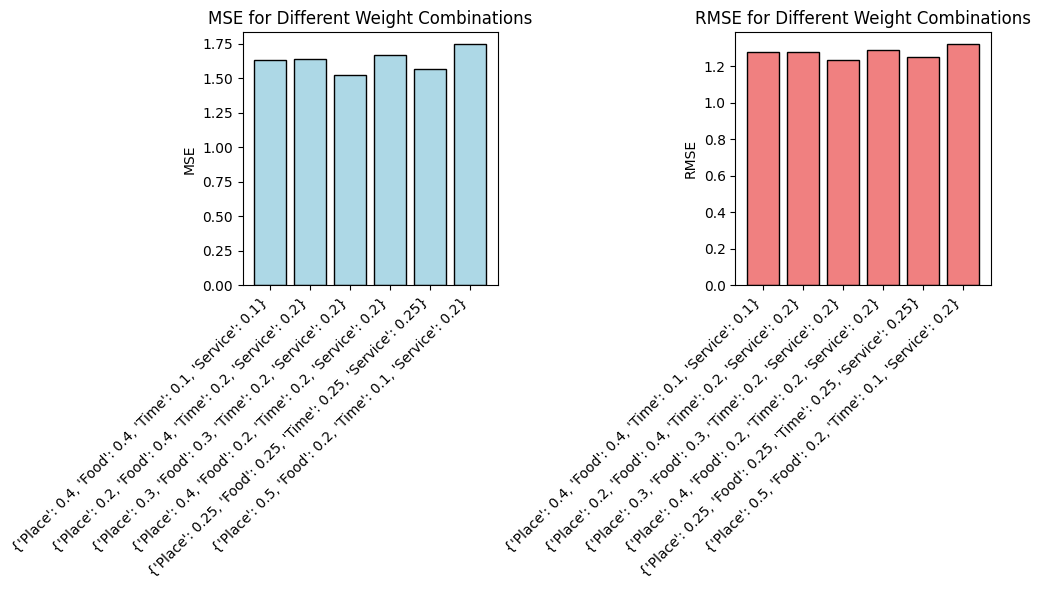

In [ ]:
mse_values = [error['MSE'] for error in errors_dict.values()]
rmse_values = [error['RMSE'] for error in errors_dict.values()]

# Plot MSE and RMSE for each weight combination
plt.figure(figsize=(10, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.bar(range(len(errors_dict)), mse_values, color='lightblue', edgecolor='black')
plt.xticks(range(len(errors_dict)), list(errors_dict.keys()), rotation=45, ha='right')
plt.title("MSE for Different Weight Combinations")
plt.ylabel("MSE")

# Plot RMSE
plt.subplot(1, 2, 2)
plt.bar(range(len(errors_dict)), rmse_values, color='lightcoral', edgecolor='black')
plt.xticks(range(len(errors_dict)), list(errors_dict.keys()), rotation=45, ha='right')
plt.title("RMSE for Different Weight Combinations")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()

# Formatting DF with Final Sentiment

In [ ]:
# Define the weights for each aspect
weights = {'Place': 0.3, 'Food': 0.3, 'Time': 0.2, 'Service': 0.2}

# Function to calculate the weighted average sentiment
def calculate_weighted_sentiment(sentiments, weights):
    weighted_sum = sum(sentiments[aspect] * weights.get(aspect, 0) for aspect in sentiments)
    total_weight = sum(weights.get(aspect, 0) for aspect in sentiments)
    return round(weighted_sum / total_weight, 0) if total_weight > 0 else 0

# Apply the function to calculate final sentiment
processed_df_nlp_similarity['final_sentiment'] = processed_df_nlp_similarity['aspect_sentiments'].apply(lambda x: calculate_weighted_sentiment(x, weights))

In [ ]:
# print(processed_df_nlp_similarity[['stars', 'aspect_sentiments', 'final_sentiment']])

new_df = processed_df_nlp_similarity[['review_id', 'user_id',	'business_id', 'text', 'stars', 'final_sentiment']].copy()

# Flatten the 'aspect_sentiments' dictionary into individual columns for each aspect
aspect_columns = ['Place', 'Food', 'Time', 'Service']  # Define the aspect keys

for aspect in aspect_columns:
    new_df[aspect] = processed_df_nlp_similarity['aspect_sentiments'].apply(lambda x: x.get(aspect, None))

# Print the new DataFrame
new_df.head(5)

,review_id,user_id,business_id,text,stars,final_sentiment,Place,Food,Time,Service
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3,3.0,5.0,5.0,1.0,1.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5,3.0,3.0,2.0,2.0,5.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3,4.0,5.0,4.9,2.0,5.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5,3.0,2.0,4.3,5.0,2.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4,3.0,2.0,2.6,1.0,5.0


In [ ]:
# Compute Absolute Error (AE) list
AE = abs(new_df['final_sentiment'] - new_df['stars'])


# Compute MSE (Mean Squared Error)
MSE = ((new_df['final_sentiment'] - new_df['stars']) ** 2).mean()

# Compute RMSE (Root Mean Squared Error)
RMSE = np.sqrt(((new_df['final_sentiment'] - new_df['stars']) ** 2).mean())

print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f}")


Mean Squared Error (MSE): 1.52
Root Mean Squared Error (RMSE): 1.23


In [ ]:
# In this example, an RMSE of 1.23 means that, on average,sentiment predictions deviate by about 1.23 stars from the actual rating.
# The MSE of 1.52 suggests that there are some squared errors contributing to the deviation, likely from cases where the predicted rating is far from the actual

In [ ]:
AE_counts = AE.value_counts().sort_index()
AE_counts

,count
0.0,247
1.0,536
2.0,193
3.0,24


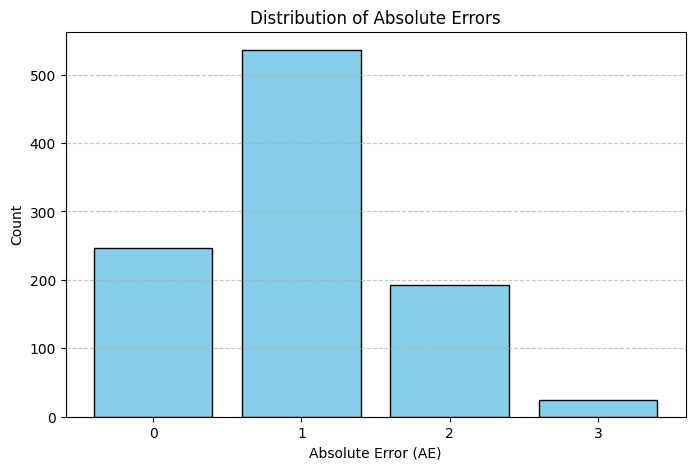

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(AE_counts.index, AE_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Absolute Error (AE)")
plt.ylabel("Count")
plt.title("Distribution of Absolute Errors")
plt.xticks(range(int(AE.max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
new_df.to_csv("yelp_1000_sentiment_output.csv")

# Documentation

1. Word Cloud
- Clean, Process, Word Counter, Frequency, Bi-Gram, Tri-Gram ✅
- Get Aspects ✅

2. Aspect Based Sentiments
- Get Aspect based Sentiments (Value on scale of 1 to 5) ✅
    - Get related words of aspects (Word Net or Semantics?) ✅
    - What if there is no sentiment allocated to the aspect  - Using 2 as default ✅
    - What models to use - Hugging Face Transformer BERT ✅
    - Combine all functions, understand the math behind ✅
    - Overall rating (Combing the sentiment using Stats Function - Only Whole Numbers) - Predicted ✅
- Compare Overall Sentiment (Predicted) with Stars (Actual) ✅
    - If Good - Validation done ✅
    - If Bad - Needs improvement ✅
        - How to allocated sentiment if the aspect is not present (neutral 2.5/5 or 4/5) ✅
        - Combining the sentiment - If weights of each aspect needs to be biased ✅

# Recommendation Systems

In [3]:
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment_output.csv to Sentiment_output.csv


Load data from sentiment analysis output (has review id, business id, user id and sentiment for all aspects, final sentiment and stars (actual)

In [6]:
ratings_df = pd.read_csv(io.BytesIO(uploaded['Sentiment_output.csv']))
ratings_df.head()

,Unnamed: 0,review_id,user_id,business_id,text,stars,final_sentiment,Place,Food,Time,Service
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3,3.0,5.0,5.0,1.0,1.0
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5,3.0,3.0,2.0,2.0,5.0
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,3,4.0,5.0,4.9,2.0,5.0
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",5,3.0,2.0,4.3,5.0,2.0
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,4,3.0,2.0,2.6,1.0,5.0


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_dataset_user.csv to Kaggle_dataset_user.csv


Load user data (has user id and user name)

In [8]:
user_df = pd.read_csv(io.BytesIO(uploaded['Kaggle_dataset_user.csv']))
user_df.head()

,Unnamed: 0,review_id,user_id,stars,name,review_count,yelping_since
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,3,NaN,NaN,NaN
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,5,NaN,NaN,NaN
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,3,NaN,NaN,NaN
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,5,NaN,NaN,NaN
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,4,NaN,NaN,NaN


In [9]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_dataset_business.csv to Kaggle_dataset_business.csv


In [10]:
business_df = pd.read_csv(io.BytesIO(uploaded['Kaggle_dataset_business.csv']))
business_df.head()

,Unnamed: 0,review_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,Philadelphia,PA,19119,39.952103,-75.172753,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [11]:
business_df.columns

Index(['Unnamed: 0', 'review_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [12]:
user_df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'stars', 'name', 'review_count',
       'yelping_since'],
      dtype='object')

Merging the 3 datasets

In [13]:
merged_df = ratings_df.merge(user_df[['review_id', 'name']], on='review_id', how='inner')
merged_df = merged_df.rename(columns={'name': 'user_name'})
merged_df.head(2)

,Unnamed: 0,review_id,user_id,business_id,text,stars,final_sentiment,Place,Food,Time,Service,user_name
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3,3.0,5.0,5.0,1.0,1.0,NaN
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,5,3.0,3.0,2.0,2.0,5.0,NaN


In [14]:
merged_df.shape

(1000, 12)

In [15]:
merged_df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'text', 'stars',
       'final_sentiment', 'Place', 'Food', 'Time', 'Service', 'user_name'],
      dtype='object')

In [16]:
final_merged_df = merged_df.merge(
    business_df[['review_id', 'business_id', 'name', 'address', 'city', 'state', 'postal_code',
                 'latitude', 'longitude', 'review_count', 'is_open', 'attributes',
                 'categories', 'hours']],
    on='review_id',
    how='inner'
)

final_merged_df = final_merged_df.rename(columns={'name': 'business_name', 'business_id_x': 'business_id'})

final_merged_df.head(1)

,Unnamed: 0,review_id,user_id,business_id,text,stars,final_sentiment,Place,Food,Time,...,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",3,3.0,5.0,5.0,1.0,...,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."


In [17]:
final_merged_df.shape

(1000, 25)

In [18]:
final_merged_df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'text', 'stars',
       'final_sentiment', 'Place', 'Food', 'Time', 'Service', 'user_name',
       'business_id_y', 'business_name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [19]:
# final_merged_df['city'].value_counts()

In [20]:
final_merged_df = final_merged_df[final_merged_df['city'].isin(['Philadelphia'])]

In [21]:

# final_merged_df.head(3)

In [22]:
final_merged_df.shape

(186, 25)

# Collaborative

In [23]:
import pandas as pd

# Preferences for each user (Most Important Step)
def get_preferred_aspects(row):
    aspects = {'Place': row['Place'], 'Food': row['Food'], 'Time': row['Time'], 'Service': row['Service']}

    # Sorting logic based on stars
    if row['stars'] >= 4:
        sorted_aspects = sorted(aspects.items(), key=lambda x: x[1], reverse=True)  # Descending for positive rating
    elif row['stars'] <= 2:
        sorted_aspects = sorted(aspects.items(), key=lambda x: x[1])  # Ascending for negative rating
    else:
        sorted_aspects = sorted(aspects.items(), key=lambda x: x[1], reverse=True)  # Neutral (default to descending)

    preferred_aspect_1 = sorted_aspects[0][0]
    preferred_aspect_2 = sorted_aspects[1][0]

    return pd.Series([preferred_aspect_1, preferred_aspect_2])

final_merged_df[['Preferred Aspect 1', 'Preferred Aspect 2']] = final_merged_df.apply(get_preferred_aspects, axis=1)


In [24]:
final_merged_df[['user_id', 'stars', 'Place', 'Food', 'Time', 'Service', 'Preferred Aspect 1', 'Preferred Aspect 2']].head()

,user_id,stars,Place,Food,Time,Service,Preferred Aspect 1,Preferred Aspect 2
1,OyoGAe7OKpv6SyGZT5g77Q,5,3.0,2.0,2.0,5.0,Service,Place
3,_7bHUi9Uuf5__HHc_Q8guQ,5,2.0,4.3,5.0,2.0,Time,Food
5,eUta8W_HdHMXPzLBBZhL1A,1,5.0,2.4,2.3,2.0,Service,Time
13,smOvOajNG0lS4Pq7d8g4JQ,4,2.0,5.0,2.0,2.0,Food,Place
16,Dd1jQj7S-BFGqRbApFzCFw,5,5.0,2.0,2.0,5.0,Place,Service


In [25]:
final_merged_df.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'text', 'stars',
       'final_sentiment', 'Place', 'Food', 'Time', 'Service', 'user_name',
       'business_id_y', 'business_name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'Preferred Aspect 1',
       'Preferred Aspect 2'],
      dtype='object')

In [26]:
final_merged_df.reset_index(drop=True, inplace=True)

In [37]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def recommend_for_user(row_index, top_n=5):

    # Get the user_id from the given row index
    user_id = final_merged_df.loc[row_index, 'user_id']

    # Get the preferred aspects of the selected user
    user_preferences = final_merged_df.loc[row_index, ['Preferred Aspect 1', 'Preferred Aspect 2']]

    # Filter users who share the same preferences
    filtered_users = final_merged_df[
        (final_merged_df['Preferred Aspect 1'].isin(user_preferences.values)) |
        (final_merged_df['Preferred Aspect 2'].isin(user_preferences.values))
    ]

    # Create user-item matrices for filtered users
    user_place_matrix = filtered_users.pivot_table(index='user_id', columns='business_id', values='Place').fillna(0)
    user_food_matrix = filtered_users.pivot_table(index='user_id', columns='business_id', values='Food').fillna(0)
    user_time_matrix = filtered_users.pivot_table(index='user_id', columns='business_id', values='Time').fillna(0)
    user_service_matrix = filtered_users.pivot_table(index='user_id', columns='business_id', values='Service').fillna(0)

    # Normalize matrices
    scaler = StandardScaler()
    user_place_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_place_matrix), columns=user_place_matrix.columns, index=user_place_matrix.index)
    user_food_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_food_matrix), columns=user_food_matrix.columns, index=user_food_matrix.index)
    user_time_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_time_matrix), columns=user_time_matrix.columns, index=user_time_matrix.index)
    user_service_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_service_matrix), columns=user_service_matrix.columns, index=user_service_matrix.index)

    # Compute cosine similarity for each aspect
    place_similarity = cosine_similarity(user_place_matrix_scaled)
    food_similarity = cosine_similarity(user_food_matrix_scaled)
    time_similarity = cosine_similarity(user_time_matrix_scaled)
    service_similarity = cosine_similarity(user_service_matrix_scaled)

    # Convert similarities to DataFrames for easier indexing
    user_ids = user_place_matrix.index
    place_similarity_df = pd.DataFrame(place_similarity, index=user_ids, columns=user_ids)
    food_similarity_df = pd.DataFrame(food_similarity, index=user_ids, columns=user_ids)
    time_similarity_df = pd.DataFrame(time_similarity, index=user_ids, columns=user_ids)
    service_similarity_df = pd.DataFrame(service_similarity, index=user_ids, columns=user_ids)

    # Get similarity scores for the given user
    place_scores = place_similarity_df[user_id]
    food_scores = food_similarity_df[user_id]
    time_scores = time_similarity_df[user_id]
    service_scores = service_similarity_df[user_id]

    # Compute overall similarity as the average of all aspects
    overall_similarity = (place_scores + food_scores + time_scores + service_scores) / 4

    # Sort users by similarity (excluding the user itself)
    similar_users = overall_similarity.sort_values(ascending=False).drop(user_id)

    # Generate recommendations
    recommended_businesses = []

    for similar_user in similar_users.index:
        similar_user_ratings = filtered_users[filtered_users['user_id'] == similar_user]

        for _, row in similar_user_ratings.iterrows():
            if row['business_id'] not in recommended_businesses:
                recommended_businesses.append(row['business_name'])
                # print(" 'stars', 'final_sentiment', 'Place', 'Food', 'Time', 'Service' ")
                # print(row['stars'], row['final_sentiment'], row['Place'], row['Food'], row['Time'], row['Service'], row['Preferred Aspect 1'],row['Preferred Aspect 2'] )
                # # 'stars', 'final_sentiment', 'Place', 'Food', 'Time', 'Service'

        if len(recommended_businesses) >= top_n:
            break

    return recommended_businesses[:top_n]

# Example: Get top 5 restaurant recommendations for the user in row 0
row_index = 0
top_5_recommendations = recommend_for_user(row_index, top_n=5)

print(f"Top 5 recommended restaurants for user at row {row_index}:")
for i, restaurant in enumerate(top_5_recommendations, 1):
    print(f"{i}. {restaurant}")



Top 5 recommended restaurants for user at row 0:
1. Citi Market place
2. MIUCHA
3. Zorba's Taverna
4. Dmitri's
5. Lazos Pizza & Grill


In [ ]:
# 1. Filter Users with Matching Preferences
#   Given a row id of a user, find users with the same Preferred Aspect 1 or Preferred Aspect 2.

# 2. Create User-Item Matrices (Only for filtered users)
#   Construct separate matrices for Place, Food, Time, and Service.

# 3. Normalize Each Matrix using StandardScaler.

# 4. Compute Cosine Similarity for each aspect.

# 5. Generate Recommendations
#   Find similar users based on cosine similarity.
#   Recommend restaurants based on highly-rated businesses by similar users.

# Content Based

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00


In [ ]:
#%%writefile app.py
#import streamlit as st


import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display


df_temp = final_merged_df

city_dropdown = widgets.Dropdown(
    options=['Philadelphia'],  # Add more cities as needed
    value='Philadelphia',
    description='City:',
)

# Dropdown for first aspect selection
aspect1_dropdown = widgets.Dropdown(
    options=['Place', 'Food', 'Time', 'Service'],
    value='Place',
    description='Aspect 1:',
)

# Dropdown for second aspect selection
aspect2_dropdown = widgets.Dropdown(
    options=['Place', 'Food', 'Time', 'Service'],
    value='Food',
    description='Aspect 2:',
)

# Function to recommend top restaurants based on two aspects and final sentiment
def recommend_restaurants(city, aspect1, aspect2):
    # Filter DataFrame by the selected city
    filtered_df = final_merged_df[final_merged_df['city'] == city]

    # Sort by the two selected aspects, then by final sentiment
    sorted_df = filtered_df.sort_values(by=[aspect1, aspect2, 'final_sentiment'], ascending=[False, False, False])

    # Get the top 5 restaurants
    top_restaurants = sorted_df.head(20)[['business_name', aspect1, aspect2, 'final_sentiment']]

    # Display the results
    print(f"Top 20 restaurants in {city} based on {aspect1} and {aspect2}, sorted by {aspect1}, {aspect2}, and Final Sentiment:")
    display(top_restaurants)

# Create an interactive widget
interact(recommend_restaurants, city=city_dropdown, aspect1=aspect1_dropdown, aspect2=aspect2_dropdown)


interactive(children=(Dropdown(description='City:', options=('Philadelphia',), value='Philadelphia'), Dropdown…

<function __main__.recommend_restaurants(city, aspect1, aspect2)>

# Rough Work and testing - Dont Run

Get Synonyms

In [ ]:
import nltk
from nltk.corpus import wordnet as wn

nltk.download('wordnet')

# Function to get synonyms from WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

# Example of expanding 'food' aspect with synonyms from WordNet
aspect_keywords = {
    "place": ["place", "location", "ambience", "atmosphere", "restaurant", "diner", "interior"],
    "food": ["food", "dish", "meal", "taste", "flavor", "eat", "curry"],
    "time": ["time", "wait", "delay", "quick", "slow", "hour", "minute", "waiting", "quicker"],
    "service": ["service", "waiter", "waitstaff", "staff", "hospitality"]
}

# Expanding the 'food' aspect using WordNet
expanded_food_keywords = set()
for keyword in aspect_keywords["food"]:
    expanded_food_keywords.update(get_synonyms(keyword))

# Print the expanded list of food-related keywords
print(expanded_food_keywords)


In [ ]:
from transformers import pipeline

# Sentiment analysis using a pre-trained model
nlp = pipeline("sentiment-analysis")
result = nlp("I love using Hugging Face Transformers!")
print(result)

Semantic Mapping

In [ ]:
import spacy
from collections import defaultdict
from spacy.lang.en import English

# Load a pre-trained word embedding model
nlp = spacy.load("en_core_web_md")  # "md" or "lg" model for better embeddings

# Sample review text (this is the text you want to classify)
review_text = """Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines"""

# Aspect reference sentences (one per category)
aspect_sentences = {
    "Food": "The food and meal was delicious, flavour, tasted good and well-prepared.",
    "Service": "The staff and owner were very friendly and provided great and quick service.",
    "Place": "The restaurant and diner had a great ambience, interior, atmosphere and location.",
    "Time": "The wait time was short and efficient."
}

# Convert aspect reference sentences to embeddings
aspect_embeddings = {aspect: nlp(sentence) for aspect, sentence in aspect_sentences.items()}

# Split the review text into sentences
review_doc = nlp(review_text)
review_sentences = [sent.text for sent in review_doc.sents]

# Store mapping of sentences to aspects
sentence_to_aspect = defaultdict(list)

# Compute similarity between review sentences and aspect categories
for sentence in review_sentences:
    sentence_embedding = nlp(sentence)
    similarities = {aspect: sentence_embedding.similarity(aspect_embedding) for aspect, aspect_embedding in aspect_embeddings.items()}

    best_aspect = max(similarities, key=similarities.get)  # Get the most similar aspect
    sentence_to_aspect[best_aspect].append(sentence)

# Print the sentence classification
for aspect, sentences in sentence_to_aspect.items():
    print(f"**{aspect}:**")
    for sent in sentences:
        print(f" - {sent}")
    print()


**Service:**
 - Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today.

**Food:**
 - Cheese curds were very good and very filling.
 - Really like that sandwiches come w salad, esp after eating too many curds!
 - Had the onion, gruyere, tomato sandwich.
 - Wasn't too much cheese which I liked.
 - Needed something else...pepper jelly maybe.
 - Would like to see more menu options added such as salads w fun cheeses.
 - Lots of beer and wine as well as limited cocktails.

**Time:**
 - Next time I will try one of the draft wines



In [ ]:
# List of business_ids to filter by
business_ids = ['_IYHl6J9iB3lbeJq27pbsg', 'YtSqYv1Q_pOltsVPSx54SA', 'bUnqKEP7h48ePxHMXV0fNw',
                'VJEzpfLs_Jnzgqh5A_FVTg',
                'V6Om7YZhlRQRU7WfuxHq8Q']

# Filter the dataframe for the given business_ids and select the desired columns
filtered_df = final_merged_df[final_merged_df['business_id'].isin(business_ids)][
    ['stars', 'final_sentiment', 'Place', 'Food', 'Time', 'Service']]

# Display the filtered dataframe
# print(filtered_df)
filtered_df = filtered_df.sort_values("Place", ascending=False)
filtered_df


In [ ]:

filtered_df2 = final_merged_df[final_merged_df['user_id']=='-5X3pQ0XrdZqNU1LHQPnpg'][
    ['stars', 'final_sentiment', 'Place', 'Food', 'Time', 'Service']]

# Display the filtered dataframe
print(filtered_df2)